# Random Forest

In [1]:
#Import dependenices
import csv
import pandas as pd
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow as tfm
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from pathlib import Path
from sklearn import tree
import joblib
import os
%matplotlib inline

2024-01-04 00:16:09.641613: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Specify the path to your CSV file
csv_file_path1 = '../Resources/Clean_test_scaled.csv'
csv_file_path2 = '../Resources/Clean_train_scaled.csv'

# Read the CSV file into a DataFrame
test_df = pd.read_csv(csv_file_path1)
train_df = pd.read_csv(csv_file_path2)

test_df.dropna(inplace=True)
train_df.dropna(inplace=True)

#Print size of data set
print(test_df.shape)
print(train_df.shape)

# Display the DataFrame
train_df.head(5)

(6397, 15)
(80683, 15)


,Current loan amount,Credit score,Annual income,Monthly debt,Years of credit history,Number of open accounts,Number of credit problems,Current credit balance,Maximum open credit,Long term,Short term,Home mortgage,Own home,Rent,Bankrupt
0,445412.0,709.0,1167493.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,0,1,1,0,0,1
1,99999999.0,741.0,2231892.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0,1,0,1,0,0
2,347666.0,721.0,806949.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,1,0,0,1,0,0
3,206602.0,7290.0,896857.0,16367.74,17.3,6.0,0.0,215308.0,272448.0,0,1,1,0,0,0
4,217646.0,730.0,1184194.0,10855.08,19.6,13.0,1.0,122170.0,272052.0,0,1,1,0,0,1


In [3]:
# Define features set
X = train_df.copy()
X.drop("Bankrupt", axis=1, inplace=True)

#X_test = test_df.copy()
#X_test.drop("Bankrupt", axis=1, inplace=True)

In [4]:
# Define target vector
y = train_df['Bankrupt'].ravel()
#y_test = test_df['Bankrupt'].ravel()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [7]:
# Fitting the model
model = model.fit(X_train, y_train)

In [8]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=600, random_state=78)

In [9]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [10]:
# Making predictions uisng the testing data
predictions = rf_model.predict(X_test)

In [11]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [12]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,17581,380
Actual 1,35,2175


Accuracy Score : 0.9794259084824748
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     17961
           1       0.85      0.98      0.91      2210

    accuracy                           0.98     20171
   macro avg       0.92      0.98      0.95     20171
weighted avg       0.98      0.98      0.98     20171



In [13]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)

[(0.7210442164008117, 'Number of credit problems'),
 (0.047956357797010345, 'Current credit balance'),
 (0.04169518457888021, 'Maximum open credit'),
 (0.03763891142791187, 'Years of credit history'),
 (0.03160368417775684, 'Monthly debt'),
 (0.03102551464427335, 'Annual income'),
 (0.028693082925941273, 'Credit score'),
 (0.02718070587945748, 'Current loan amount'),
 (0.020169332638330244, 'Number of open accounts'),
 (0.0031964186427290257, 'Home mortgage'),
 (0.003059670010050722, 'Rent'),
 (0.0023147458449171987, 'Short term'),
 (0.0022616472731997778, 'Long term'),
 (0.0021605277587299562, 'Own home')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

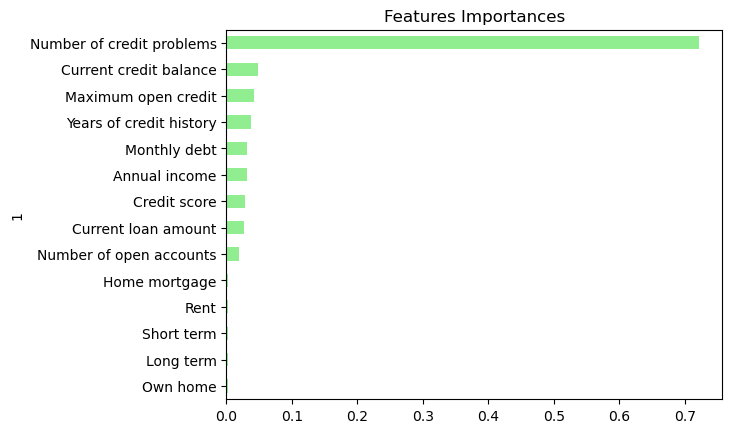

In [14]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# Random Forest Optimisation

### Number of trees (n_estimaters)

In [15]:
# Create a random forest classifier
rf_model = eer(n_estimators=3000, random_state=78)

In [16]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [17]:
# Making predictions uisng the testing data
predictions = rf_model.predict(X_test)

In [18]:
# Calculating the confusion matrix
cm1 = confusion_matrix(y_test, predictions)
cm_df1 = pd.DataFrame(
    cm1, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score1 = accuracy_score(y_test, predictions)

In [19]:
# Displaying results
print("Confusion Matrix")
display(cm_df1)
print(f"Accuracy Score : {acc_score1}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,17580,381
Actual 1,37,2173


Accuracy Score : 0.979277180110059
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     17961
           1       0.85      0.98      0.91      2210

    accuracy                           0.98     20171
   macro avg       0.92      0.98      0.95     20171
weighted avg       0.98      0.98      0.98     20171



In [20]:
# Outcome
print(f'Orginal score: {acc_score}')
print(f'Optimised score: {acc_score1}')

Orginal score: 0.9794259084824748
Optimised score: 0.979277180110059


# Class weight adjustment

In [31]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=3000, class_weight = 'balanced', max_depth = 20, random_state=78)

In [32]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [33]:
# Making predictions uisng the testing data
predictions = rf_model.predict(X_test)

In [34]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score3 = accuracy_score(y_test, predictions)

In [30]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,17384,577
Actual 1,3,2207


Accuracy Score : 0.9794259084824748
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     17961
           1       0.79      1.00      0.88      2210

    accuracy                           0.97     20171
   macro avg       0.90      0.98      0.93     20171
weighted avg       0.98      0.97      0.97     20171



In [ ]:
# Set the path for saving the model
model_path = "../Resources/random_forest_model.joblib"
# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(model_path), exist_ok=True)
# Save the model to the specified path using joblib
joblib.dump(rf_model, model_path)
print(f"Model saved as {model_path}")